In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
plt.rcParams.update({'text.color' : "white", 'axes.labelcolor' : "white", 'xtick.color' : "white", 'ytick.color' : "white"})

In [ ]:
data = pd.read_csv("Delhi_Weather_data.csv")

In [ ]:
data

In [ ]:
pd.isnull(data).any()

In [ ]:
plt.figure(figsize=[10,6])
plt.hist(data['description'], bins=50, ec='black', color='#2196F3')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.show()

In [ ]:
del data["dt_txt"]
del data["day"]
del data["time_of_record"]

In [ ]:
data.describe()

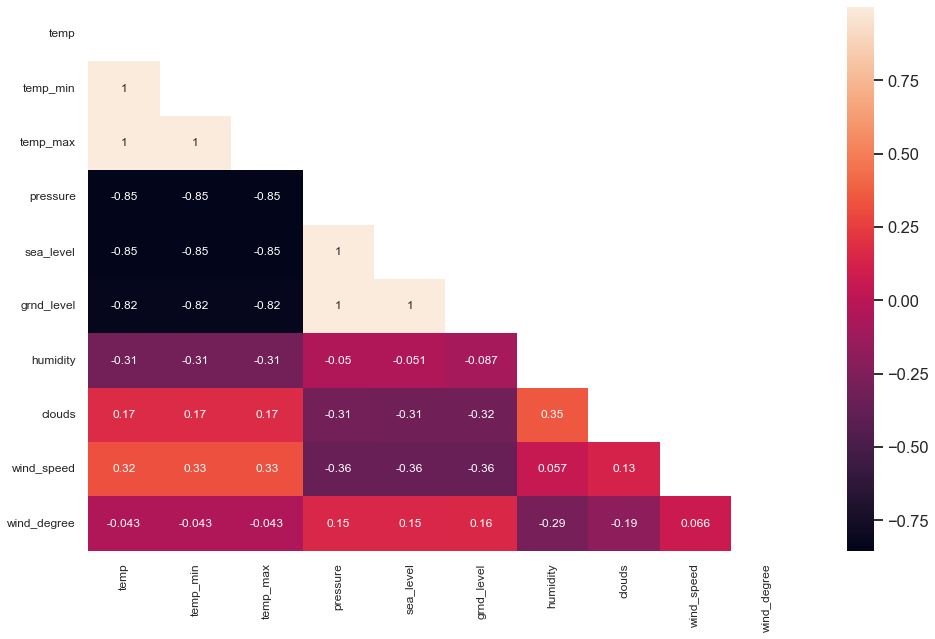

In [43]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=[16,10])
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size":12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
desc_n = pd.read_csv("desc_n.csv")
desc_n

In [ ]:
print(type(data))
print(type(desc_n))

In [ ]:
data1 = pd.concat([data, desc_n], axis=1)

In [ ]:
data1

In [ ]:
weeks = pd.read_csv("weeks.csv")
data1 = pd.concat([data1,weeks], axis=1)

In [ ]:
mask = np.zeros_like(data1.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=[16,10])
sns.heatmap(data1.corr(), mask=mask, annot=True, annot_kws={"size":12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data1['desc_n'], y=data['temp'], kind='hex',size=7, color='blue')
plt.show()

In [ ]:
del data1['wind_degree']

In [ ]:
plt.scatter(data1['desc_n'], data['temp_min'])
plt.show()

In [ ]:
%%time

sns.pairplot(data1, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.savefig('lin_reg.png')
plt.show()

In [ ]:
del data1['main']
del data1['description']
del data1['date']

In [46]:
desc = data1['desc_n']
features = data1.drop('desc_n', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features , desc, test_size=0.3, random_state=10)

# % of test dataset
#len(X_train)/len(features)
print(y_test)


898      3
4300     1
529      1
4148     2
7888     6
        ..
9336     1
11057    1
4375     1
2230     3
6209     7
Name: desc_n, Length: 4574, dtype: int64


In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)


pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

In [ ]:
# r-square for training and test dataset

print('Training data r-squared : ', regr.score(X_train, y_train))
print('Testing data r-squared : ', regr.score(X_test, y_test))

In [ ]:
plt.figure(figsize=[10,6])
plt.hist(data['temp'], bins=50, ec='black', color='#2196F3')
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pre = rf.predict(X_test)
print(accuracy_score(y_test, pre))

In [ ]:
inp=np.array([[20.94],[20.94],[20.94],[1016],[1016],[990],[51],[59],[1.77],[8]])
#20.94	20.94	20.94	1016	1016	990	51	59	1.77	8
inp=inp.reshape(1,-1)
print("The weather is: ",rf.predict(inp))